In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
installs = pd.read_csv('/home/fede/Desktop/Datos/TPPandas/installs.csv.gzip', compression = 'gzip')

In [3]:
installs.loc[:,'created'] = pd.to_datetime(installs['created'], errors = 'coerce')

In [4]:
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18


In [5]:
installs.columns

Index(['created', 'application_id', 'ref_type', 'ref_hash', 'click_hash',
       'attributed', 'implicit', 'device_countrycode', 'device_brand',
       'device_model', 'session_user_agent', 'user_agent', 'event_uuid',
       'kind', 'wifi', 'trans_id', 'ip_address', 'device_language'],
      dtype='object')

In [6]:
installs.count()

created               3412
application_id        3412
ref_type              3412
ref_hash              3412
click_hash               0
attributed            3412
implicit              3412
device_countrycode    3412
device_brand          1047
device_model          3411
session_user_agent    3364
user_agent            1729
event_uuid             865
kind                   865
wifi                  1729
trans_id                 6
ip_address            3412
device_language       3378
dtype: int64

In [7]:
installs.dtypes

created               datetime64[ns]
application_id                 int64
ref_type                       int64
ref_hash                       int64
click_hash                   float64
attributed                      bool
implicit                        bool
device_countrycode             int64
device_brand                 float64
device_model                 float64
session_user_agent            object
user_agent                    object
event_uuid                    object
kind                          object
wifi                          object
trans_id                      object
ip_address                     int64
device_language              float64
dtype: object

In [8]:
implicit = installs[installs['implicit'] == True]

In [9]:
implicit['device_countrycode'].value_counts()

6333597102633388268    520
2970470518450881158    345
Name: device_countrycode, dtype: int64

In [10]:
implicit['application_id'].value_counts()

9     196
7     172
10    142
8     102
16     93
2      39
29     26
20     26
15     20
6      12
0       9
12      8
17      6
24      5
21      3
5       3
33      1
30      1
34      1
Name: application_id, dtype: int64

In [11]:
implicit['session_user_agent'].value_counts()

http-kit/2.0                         498
adjust.com                           345
HasOffers Mobile AppTracking v1.0     22
Name: session_user_agent, dtype: int64

In [12]:
implicit['created'].max()

Timestamp('2019-03-13 23:46:39.961000')

In [13]:
implicit['created'].min()

Timestamp('2019-03-05 00:00:38.219000')

In [14]:
(implicit['created'] < '2019-03-11').sum()

542

In [15]:
dates = implicit['created'].dt.day

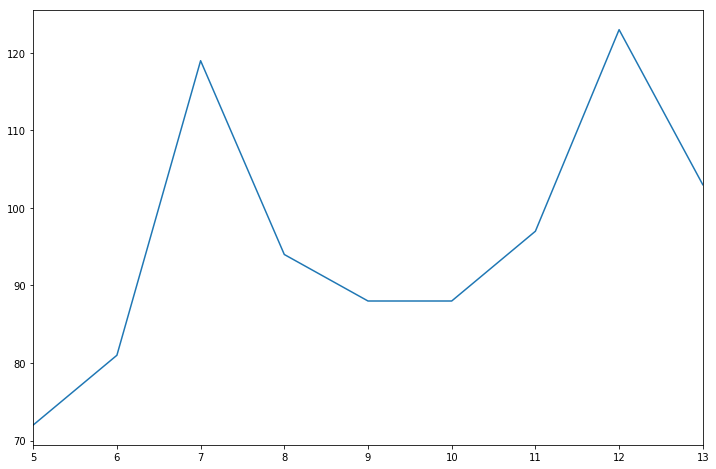

In [45]:
#Gráfico de cantidad de acciones por día.
p = dates.value_counts()
p.sort_index().plot(figsize = (12,8))
plt.show()

In [17]:
dates.value_counts()

12    123
7     119
13    103
11     97
8      94
10     88
9      88
6      81
5      72
Name: created, dtype: int64

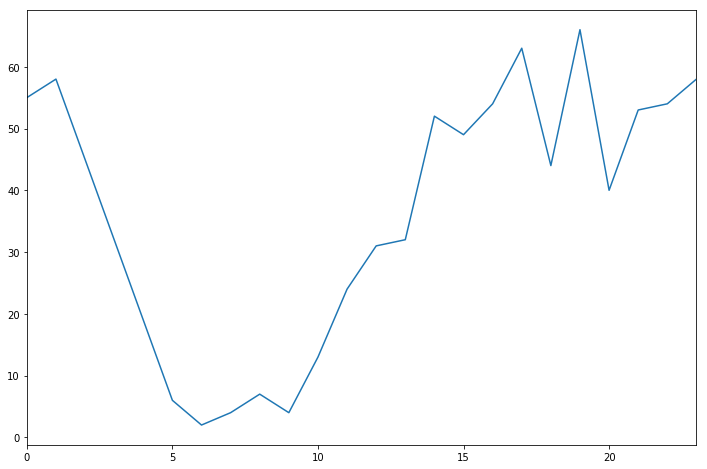

In [41]:
#Gráfico de acciones por hora del día.
times = implicit['created'].dt.hour
q = times.value_counts()
q.sort_index().plot(figsize = (12,8))
plt.show()

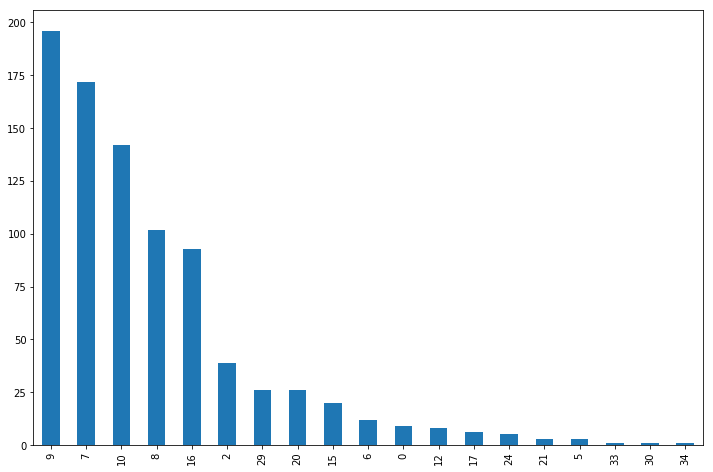

In [42]:
#Gráfico de cantidad de acciones por aplicación
apps = implicit['application_id']
r = apps.value_counts()
r.plot(kind = 'bar', figsize = (12,8))
plt.show()

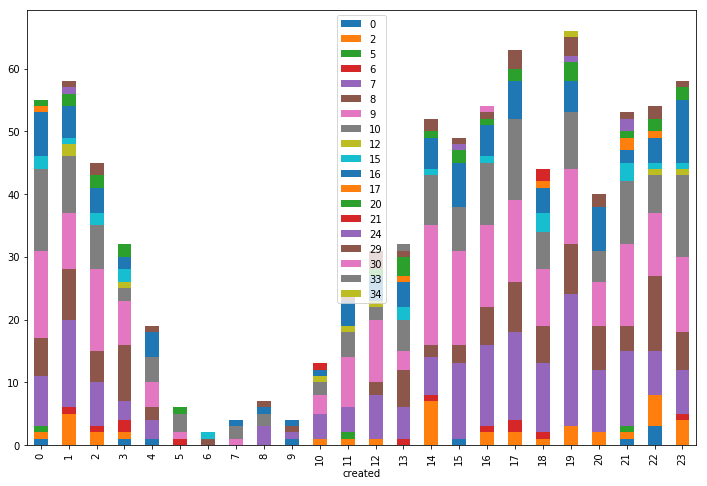

In [43]:
#Gráfico de cantidad de acciones por hora del día y por aplicación.
app = implicit[['created','application_id']].groupby([implicit['created'].dt.hour]).agg({'application_id' : 'value_counts'})
app['application_id'].unstack().plot(kind = 'bar', stacked = True, figsize = (12, 8)).legend(loc = 'best')
plt.show()

In [22]:
installs['device_brand'].value_counts()

3.083059e+17    472
2.208835e+18    185
2.523246e+18    116
5.951325e+18     72
2.987569e+18     40
3.812621e+18     37
5.137992e+17     34
6.538562e+18     26
3.228516e+18      9
1.083369e+18      9
4.371308e+18      7
3.093166e+18      5
2.262848e+18      5
4.994101e+18      4
3.849490e+18      4
8.285870e+18      3
3.742387e+18      3
5.645692e+18      3
8.230045e+17      3
6.111647e+18      3
9.169527e+18      1
5.588755e+18      1
3.172231e+18      1
5.189983e+18      1
3.624089e+18      1
7.855186e+18      1
2.748831e+18      1
Name: device_brand, dtype: int64

In [24]:
installs['device_model'].value_counts().count()

415

In [25]:
installs[(installs['user_agent'].str.contains("MercadoPago", na = False))]['user_agent'].count()

731

In [26]:
installs['kind'].value_counts()

af_app_opened                 428
app_open                      212
EVENT_Homepage                 70
open                           36
EVENT_OPEN_APP                 33
Open                           22
login_success                  17
account_summary_first_step     13
EVENT_HOMEPAGE                  6
EVENT_LISTINGVIEW_FLIGHT        6
deeplink                        5
reattribution                   4
payment method add              3
registration                    3
journey first drop off          2
install                         1
journey reserved                1
EVENT_PROMO                     1
af_list_view                    1
journey drop off                1
Name: kind, dtype: int64

In [47]:
installs['wifi'].value_counts()

True     1377
False     352
Name: wifi, dtype: int64

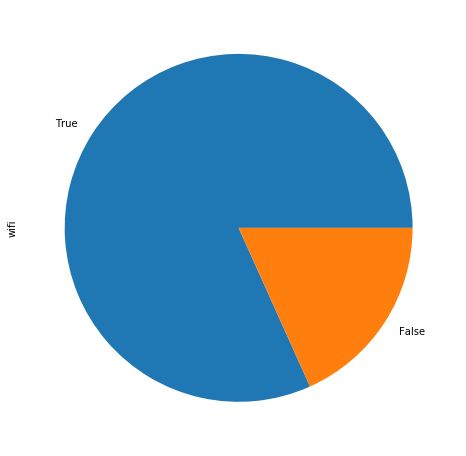

In [50]:
implicit['wifi'].value_counts(normalize = True).plot(kind = 'pie', figsize = (12,8))
plt.show()

In [39]:
user_agents = implicit['user_agent'].dropna()

In [72]:
implicit['device_brand'].value_counts()

3.083059e+17    141
2.208835e+18     49
2.523246e+18     36
5.137992e+17     15
5.951325e+18     12
6.538562e+18     10
2.987569e+18     10
3.812621e+18      6
1.083369e+18      3
4.371308e+18      2
4.994101e+18      2
3.849490e+18      2
3.093166e+18      1
6.111647e+18      1
3.742387e+18      1
2.748831e+18      1
8.285870e+18      1
5.645692e+18      1
3.228516e+18      1
Name: device_brand, dtype: int64

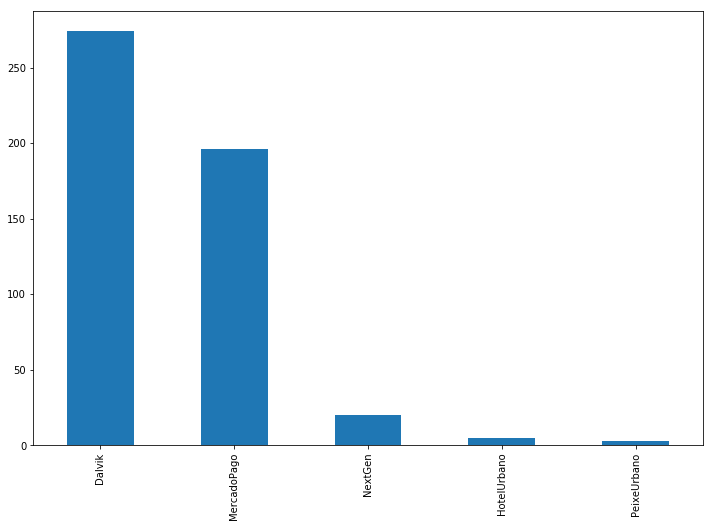

In [44]:
agents = user_agents.apply(lambda x : (x.split('/'))[0]).value_counts()
agents.plot(kind = 'bar', figsize = (12,8))
plt.show()

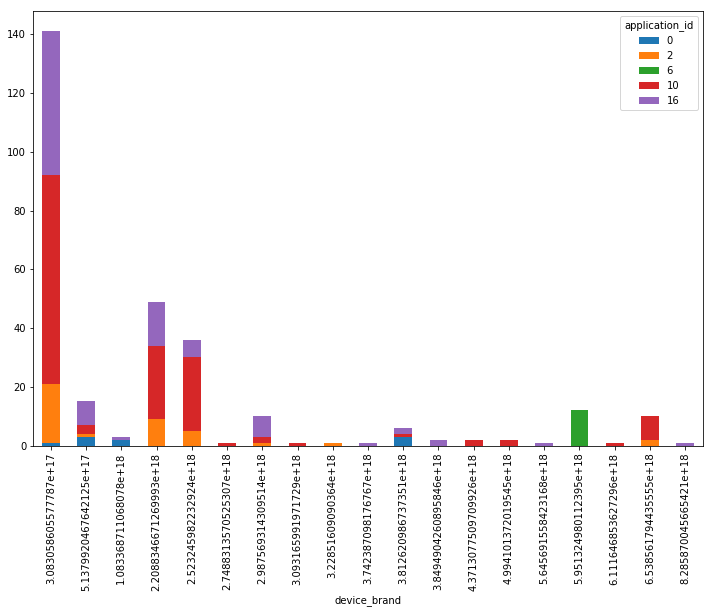

In [63]:
#Gráfico de cantidad de por marca y por aplicación
brands = implicit[['application_id', 'device_brand']].groupby('device_brand').agg({'application_id' : 'value_counts'})
brands['application_id'].unstack().plot(kind = 'bar', stacked = True, figsize = (12,8))
plt.show()

In [81]:
models = installs[['application_id', 'device_model', 'implicit']].groupby(['device_model','application_id']).agg({'implicit' : 'mean'})
models

implicit
device_model application_id          
5.112505e+16 2               0.000000
             10              0.500000
             16              0.500000
7.252441e+16 16              0.000000
1.065211e+17 7               0.000000
1.187661e+17 1               0.000000
             6               0.666667
             8               0.393939
             12              0.500000
             20              0.375000
             26              0.000000
1.819881e+17 7               0.500000
2.066431e+17 2               0.250000
             3               0.000000
             7               0.166667
             10              0.384615
             16              0.200000
             29              1.000000
2.091433e+17 16              0.000000
2.365619e+17 7               0.000000
2.642581e+17 1               0.000000
             6               0.500000
             8               0.272727
             20              0.333333
             26              0.000000
2.810099e+17 2               0.000000
             3               0.000000
             7               0.000000
             16              0.250000
             34              0.000000
...                               ...
9.053558e+18 10              0.000000
9.074460e+18 8               0.000000
9.081824e+18 16              0.000000
9.092894e+18 7               1.000000
             29              1.000000
9.096051e+18 10              1.000000
9.098097e+18 34              0.000000
9.098443e+18 2               0.200000
             10              0.444444
             16              0.125000
9.109466e+18 2               0.285714
             10              0.000000
             16              0.200000
9.149036e+18 1               0.000000
             6               0.000000
             8               0.394737
             12              0.000000
             20              0.333333
             26              0.000000
9.158814e+18 16              0.000000
9.177626e+18 2               0.333333
9.179743e+18 0               1.000000
             7               0.000000
9.217611e+18 10              1.000000
9.221733e+18 7               0.000000
             10              0.333333
             14              0.000000
             16              0.000000
             29              0.000000
9.222450e+18 10              0.500000

[800 rows x 1 columns]

In [79]:
implicit['application_id'].value_counts()

9     196
7     172
10    142
8     102
16     93
2      39
29     26
20     26
15     20
6      12
0       9
12      8
17      6
24      5
21      3
5       3
33      1
30      1
34      1
Name: application_id, dtype: int64

In [82]:
implicit['kind'].value_counts()

af_app_opened                 428
app_open                      212
EVENT_Homepage                 70
open                           36
EVENT_OPEN_APP                 33
Open                           22
login_success                  17
account_summary_first_step     13
EVENT_HOMEPAGE                  6
EVENT_LISTINGVIEW_FLIGHT        6
deeplink                        5
reattribution                   4
registration                    3
payment method add              3
journey first drop off          2
journey drop off                1
install                         1
af_list_view                    1
EVENT_PROMO                     1
journey reserved                1
Name: kind, dtype: int64

In [87]:
implicit['kind'].replace('open', 'Open', inplace = True)
implicit['kind'].replace(['EVENT_HOMEPAGE', 'EVENT_Homepage'], 'Event Homepage', inplace = True)

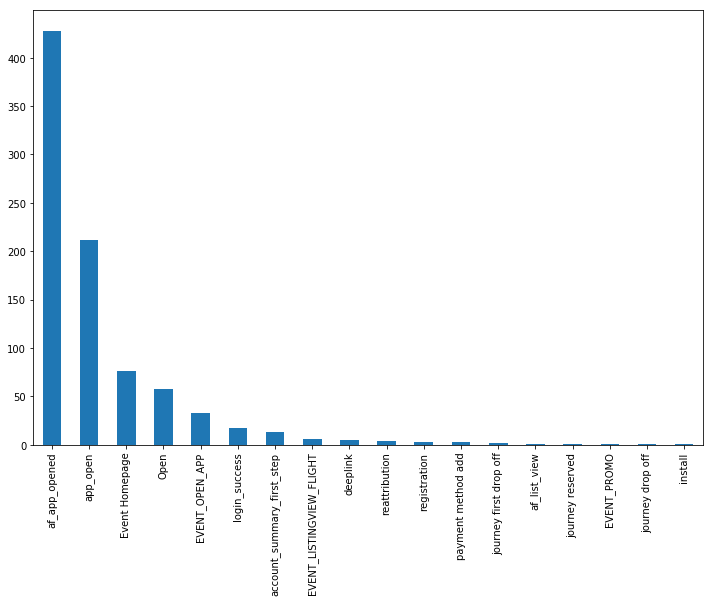

In [94]:
#Gráfico de tipos de acciones
implicit['kind'].value_counts().plot(kind = 'bar', figsize = (12,8))
plt.show()

In [92]:
installs['kind'].count()

865

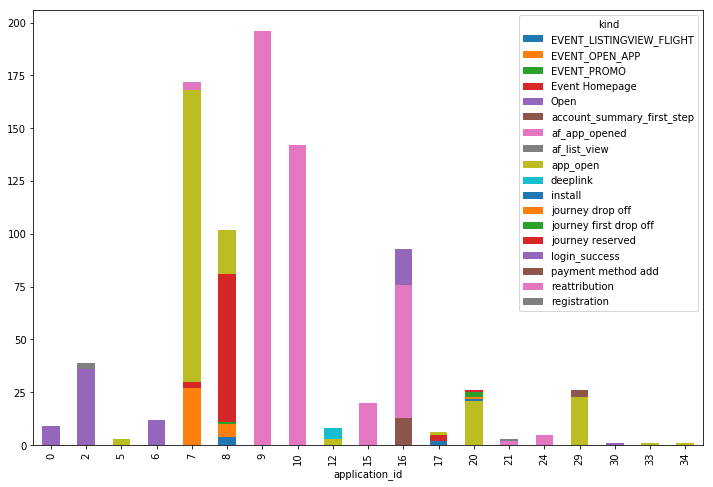

In [96]:
#Gráfico de cantidad de por marca y por aplicación
brands = implicit[['application_id', 'kind']].groupby('application_id').agg({'kind' : 'value_counts'})
brands['kind'].unstack().plot(kind = 'bar', stacked = True, figsize = (12,8))
plt.show()

In [102]:
installs['session_user_agent'].value_counts()

http-kit/2.0                                                                                                                                                                                                                                                                  1729
adjust.com                                                                                                                                                                                                                                                                    1592
HasOffers Mobile AppTracking v1.0                                                                                                                                                                                                                                               22
Mozilla/5.0 (iPhone; CPU iPhone OS 12_1_4 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.0 Mobile/15E148 Safari/604.1                                      

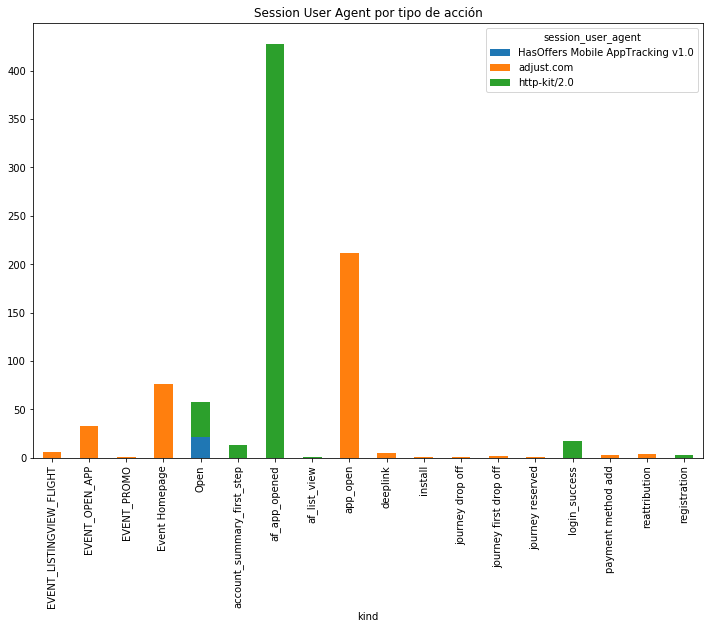

In [107]:
kinds = implicit[['session_user_agent', 'kind']].groupby('kind').agg({'session_user_agent' : 'value_counts'})
kinds['session_user_agent'].unstack().plot(title = 'Session User Agent por tipo de acción', kind = 'bar', stacked = True, figsize = (12,8))
plt.show()

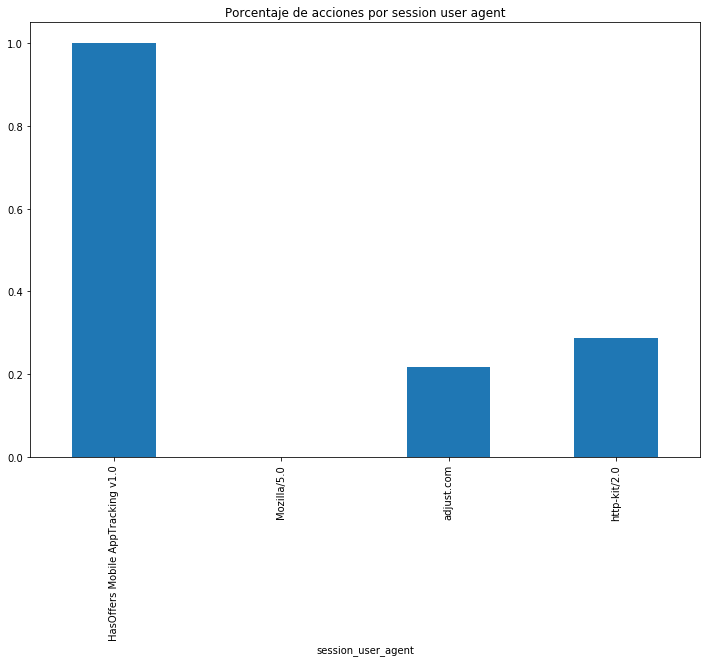

In [122]:
replaced = installs.replace(['Mozilla/5.0 (iPhone; CPU iPhone OS 12_1_4 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.0 Mobile/15E148 Safari/604.1',
                                                  'Mozilla/5.0 (iPhone; CPU iPhone OS 12_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) CriOS/72.0.3626.101 Mobile/15E148 Safari/605.1',
                                                  'Mozilla/5.0 (iPhone; CPU iPhone OS 12_1_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.0 Mobile/15E148 Safari/604.1',
                                                  'Mozilla/5.0 (iPhone; CPU iPhone OS 12_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) GSA/68.0.234683655 Mobile/15E148 Safari/605.1',
                                                  'Mozilla/5.0 (iPhone; CPU iPhone OS 12_1_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/16C101 [FBAN/FBIOS;FBAV/208.0.0.48.103;FBBV/141927594;FBDV/iPhone9,3;FBMD/iPhone;FBSN/iOS;FBSV/12.1.2;FBSS/2;FBCR/O2;FBID/phone;FBLC/en_GB;FBOP/5;FBRV/143280066]',
                                                  'Mozilla/5.0 (iPad; CPU OS 12_1_4 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.0 Mobile/15E148 Safari/604.1',
                                                    'Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 like Mac OS X) AppleWebKit/604.5.6 (KHTML, like Gecko) Version/11.0 Mobile/15D100 Safari/604.1',
                                                   'Mozilla/5.0 (iPhone; CPU iPhone OS 11_4_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/11.0 Mobile/15E148 Safari/604.1',
                                                   'Mozilla/5.0 (Linux; Android 6.0; ALE-L23) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.105 Mobile Safari/537.36'], 'Mozilla/5.0')
sess = replaced[['session_user_agent', 'implicit']].groupby('session_user_agent').agg({'implicit':'mean'})
sess['implicit'].plot(title = 'Porcentaje de acciones por session user agent', kind = 'bar', figsize = (12,8))
plt.show()